# Problem Statement
### Problem background
Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.<br><br>

<h6>The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -<h6>

1. Which type of hosts to acquire more and where?
2. The categorisation of customers based on their preferences.
    
    * What are the neighbourhoods they need to target?
    * What is the pricing ranges preferred by customers?
    * The various kinds of properties that exist w.r.t. customer preferences.
    * Adjustments in the existing properties to make it more customer-oriented.
3. What are the most popular localities and properties in New York currently?
4. How to get unpopular properties more traction? and so on...<br><br><br>
<b>Note:</b> These points are just to give you an initial understanding of how to proceed with the analysis and the kind of questions you need to ask. In addition to this, you would need to further understand the data (attached below in this page) and analyse important insights that you feel are required for the audiences mentioned for each of the two presentations.

 

### End Objective
To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York. Based on this analysis, you need to give two presentations to the following groups.<br>

* Presentation - I
    * Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
    * Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.
* Presentation - II
    * Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
    * Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

# Some tips before starting the case study
<h6>Please go through all of the points mentioned below carefully.</h6>

1. The case study has been kept deliberately vague with little background information. So don't get worried and make sure you perform a thorough analysis of the data and extract the most meaningful insights.<br><br>
2. Many a time you do get such loosely presented business problems where you don't have much business background. In such cases, it is important to stick to the basics and perform all data cleaning, analysis and visualisation processes structurally.<br><br>
3. This assignment is different from the ones you have solved before. Make sure that you treat this case study as a storytelling exercise and not an analysis/visualisation one. This will help you be better prepared for the presentations.<br><br>
4. Although this is a storytelling exercise meaning that the tasks performed on the data are not important for the end objective, there is a methodology document that you need to submit. This document should ideally contain the entire methodology, technical details, and assumptions wherever applicable.<br><br> 
5. This document is also necessary to verify all the steps you have performed to arrive at the final presentations and hence without it, your presentations will not be graded.
The data cleaning, analysis, and visualisation part can be done on any tool(s) of your choice. But again, make sure that you are documenting all the steps, assumptions, and major codes/plots.<br><br>
6. Once you are done with the analysis and visualisations, there will be many insights at your hand. Make sure that you map the right visuals and takeaways with the right audience since some of these insights might be relevant to one group but not to the other group.<br><br>
7. Recall all the elements mentioned by Utkalika and always try to follow the rules to tell a good data story while creating the presentation.<br><br>
8. Most importantly, have fun solving this case study!

: 

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, plotly.graph_objects as go

In [5]:
import os
os.chdir('C:\\Users\\91703\\Downloads')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting the dataframe truncation to none
pd.set_option('max_columns',None,'max_rows',None,'display.width',None,'display.max_colwidth',None,'display.max_rows',None)   

OptionError: 'Pattern matched multiple keys'

In [4]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [6]:
airbnb.shape

(48895, 16)

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<b><em><font color='salmon'>As last_review column is date we are parsing it as date and reading the df again</font></em></b>

In [8]:
airbnb = pd.read_csv('AB_NYC_2019.csv', parse_dates=[12])

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [10]:
# checking statistical summary
airbnb.describe([0.01,0.25,0.5,0.75,0.9,0.95])  

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
1%,1.717151e+05,1.006922e+05,40.596687,-74.026774,30.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
90%,3.399094e+07,2.128114e+08,40.804890,-73.907810,269.000000,28.000000,70.000000,3.630000,5.000000,337.000000
95%,3.525910e+07,2.417646e+08,40.825643,-73.865771,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000


In [11]:
airbnb.isnull().sum()/len(airbnb)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

###### name

In [12]:
airbnb[airbnb.name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-08-06,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-02-01,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaT,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaT,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaT,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-05-01,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaT,NaN,5,0


###### host_name

In [13]:
airbnb[airbnb.host_name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-08-07,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-02-01,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-01-07,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-01-08,0.02,1,0


In [14]:
1 - airbnb[airbnb.host_name.isnull() | airbnb.name.isnull()].shape[0]/len(airbnb)

0.9992432764086308

<b><em><font color='salmon'>We can drop all rows with name and host_name as nan; we still retain 99.9% data</font></em></b>

###  dropping those rows

In [15]:
airbnb = airbnb[-(airbnb.host_name.isnull() | airbnb.name.isnull())]

### last_review & reviews_per_month

In [16]:
airbnb[airbnb.last_review.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


In [17]:
airbnb[airbnb.reviews_per_month.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


In [18]:
airbnb[airbnb.last_review.isnull() & airbnb.reviews_per_month.isnull()].shape

(10037, 16)

In [19]:
airbnb[airbnb.reviews_per_month.isnull()].shape

(10037, 16)

In [20]:
airbnb[airbnb.last_review.isnull()].shape

(10037, 16)

<b><em><font color='salmon'>We can observe that all the rows which have last_review as nan also have reviews_per_month as nan</font></em></b>

In [21]:
airbnb.last_review.describe()

count                   38821
unique                   1764
top       2019-06-23 00:00:00
freq                     1413
first     2011-03-28 00:00:00
last      2019-12-06 00:00:00
Name: last_review, dtype: object

### creating a new df where last_review and reviews_per_month are nan

In [22]:
temp = airbnb[airbnb.last_review.isnull() & airbnb.reviews_per_month.isnull()]

In [23]:
temp.shape

(10037, 16)

In [24]:
temp.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.003700e+04,1.003700e+04,10037.000000,10037.000000,10037.000000,10037.000000,10037.0,0.0,10037.000000,10037.000000
mean,2.259155e+07,8.072752e+07,40.732082,-73.956121,192.995417,11.434193,0.0,NaN,14.813390,104.737571
std,1.135150e+07,8.715516e+07,0.052583,0.043813,358.890467,27.511597,0.0,NaN,50.398555,139.080488
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208924e+07,1.207612e+07,40.697570,-73.984780,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.341778e+07,3.982834e+07,40.728900,-73.960180,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.403395e+07,1.331238e+08,40.763630,-73.939880,200.000000,14.000000,0.0,NaN,2.000000,215.000000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,999.000000,0.0,NaN,327.000000,365.000000


<b><em><font color='salmon'>we can see that the number_of_reviews are 0 when last_review & review_per_month are nan;
    This means they never recieved reviews<br><br>
    we can change reviews_per_month to 0 for such cases<br>
    and we can set a dummy date in last_review so we will retain the data while maintaining its quality
    
</font></em></b>

In [25]:
# changing nan to 0 in reviews_per_month col
airbnb[['reviews_per_month']] = airbnb[['reviews_per_month']].fillna(0)

In [26]:
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [27]:
import datetime

In [28]:
airbnb.last_review.sample(15)

13347          NaT
45989          NaT
878     2019-01-07
16934   2018-06-25
15408   2019-05-05
22700   2018-12-15
34390          NaT
10498   2015-09-18
32645   2019-05-16
27947          NaT
28952   2018-07-10
48568          NaT
19574          NaT
35426   2019-05-18
48687          NaT
Name: last_review, dtype: datetime64[ns]

In [29]:
# changing NaT to a dummy date - 1970/1/1
airbnb.last_review = airbnb.last_review.fillna(datetime.datetime(1970,1,1))

In [30]:
airbnb.last_review.describe()

count                   48858
unique                   1765
top       1970-01-01 00:00:00
freq                    10037
first     1970-01-01 00:00:00
last      2019-12-06 00:00:00
Name: last_review, dtype: object

In [31]:
# we have handeled all the data
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [33]:
l = airbnb.columns[(airbnb.dtypes == 'int64').values | (airbnb.dtypes == 'float64').values].tolist()


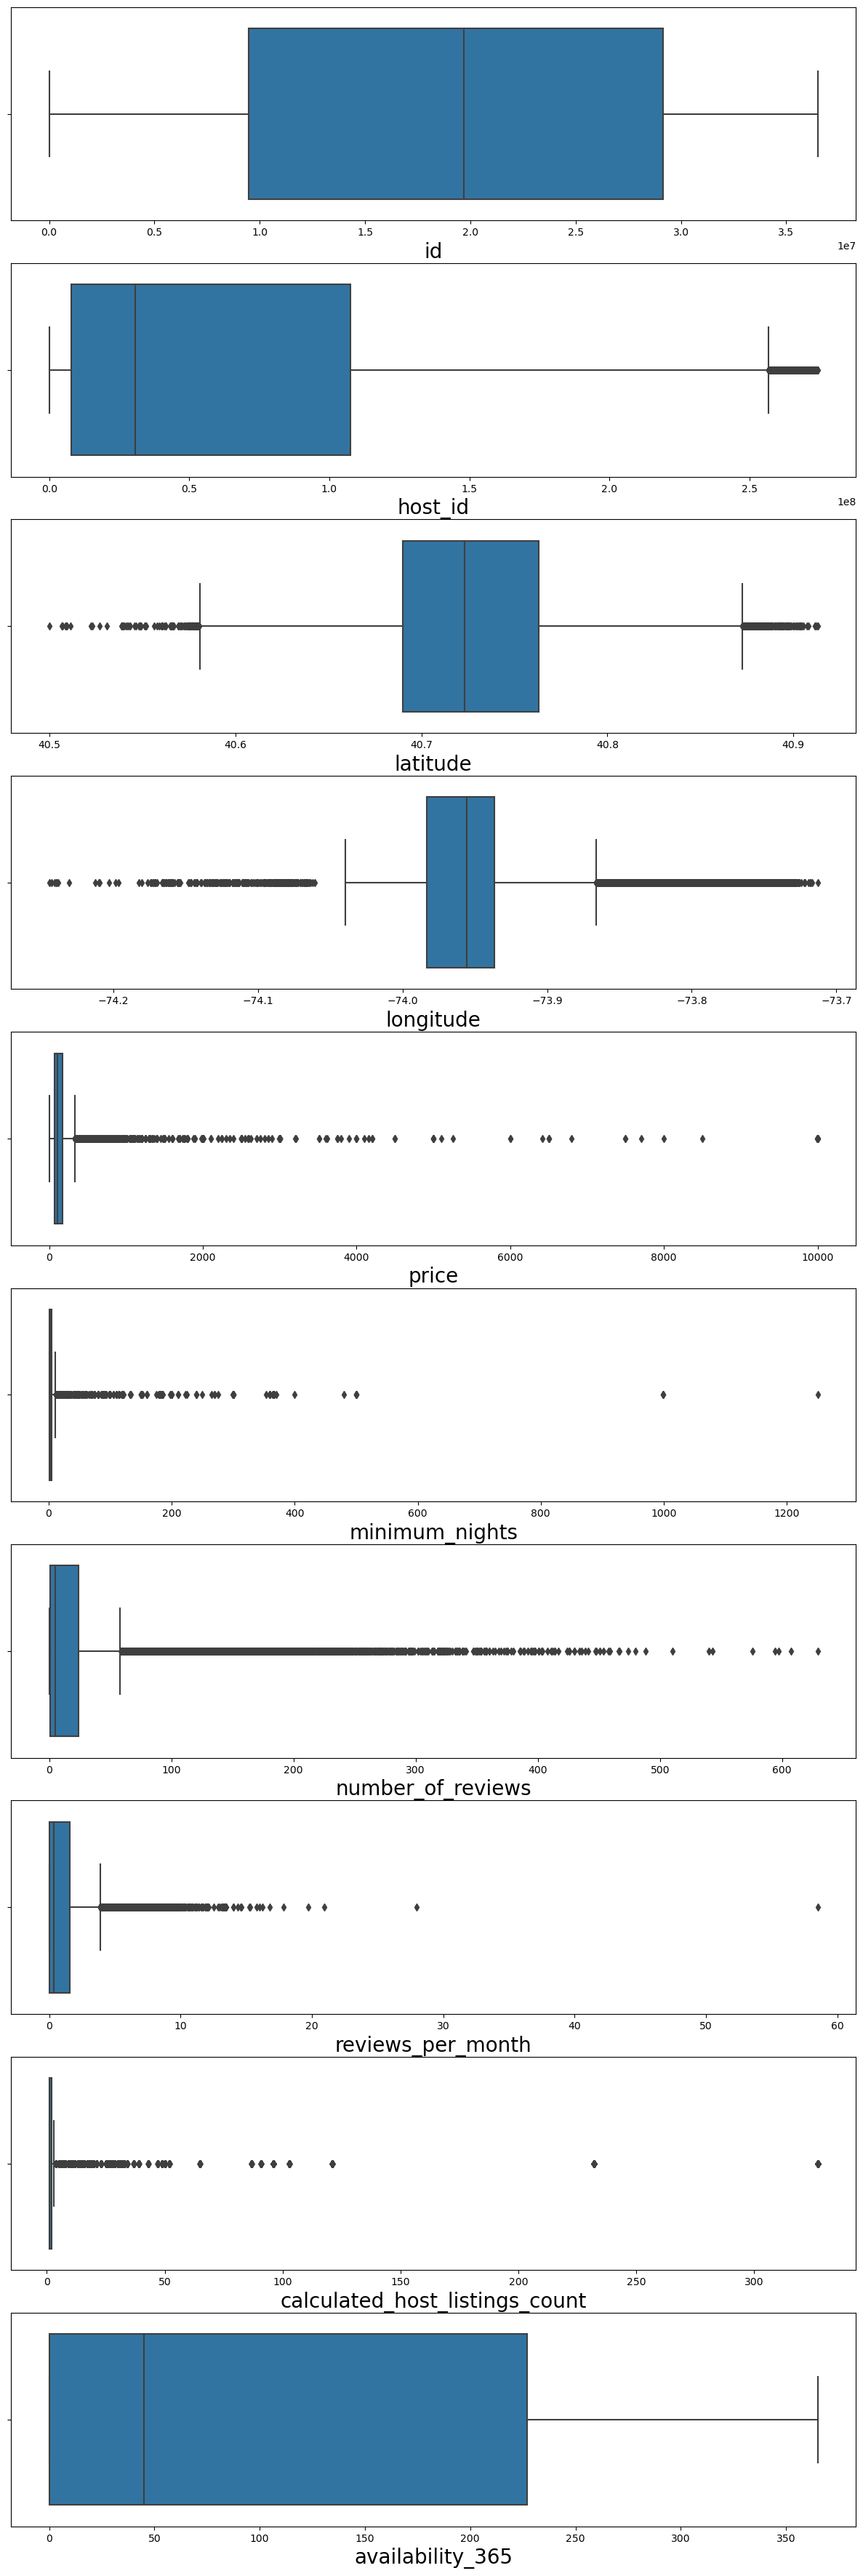

In [34]:
plt.figure(figsize = [15,45])
for i,j in zip(l,range(1,len(l)+1)):
    plt.subplot(len(l),1,j)
    sns.boxplot(airbnb[i])
    plt.xlabel(i, fontdict={'fontsize':20})

### Price

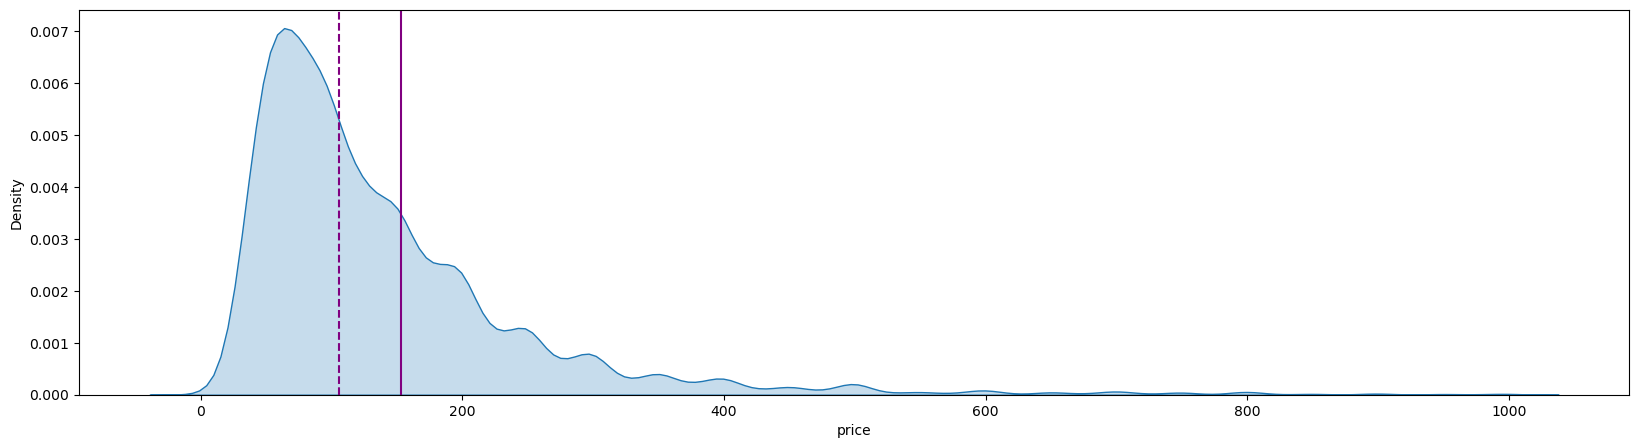

In [35]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb.price[airbnb.price<1000], shade = True)
plt.axvline(airbnb.price.mean(), color='purple')
plt.axvline(airbnb.price.median(), ls='--', color='purple')

In [36]:
airbnb.price.describe([0,0.1,.9,.95,.98,.99,.993,.995,.996,.997,.998,.999])

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
0%           0.000000
10%         49.000000
50%        106.000000
90%        269.000000
95%        355.000000
98%        550.000000
99%        799.000000
99.3%      950.000000
99.5%     1000.000000
99.6%     1200.000000
99.7%     1500.000000
99.8%     2000.000000
99.9%     3000.000000
max      10000.000000
Name: price, dtype: float64

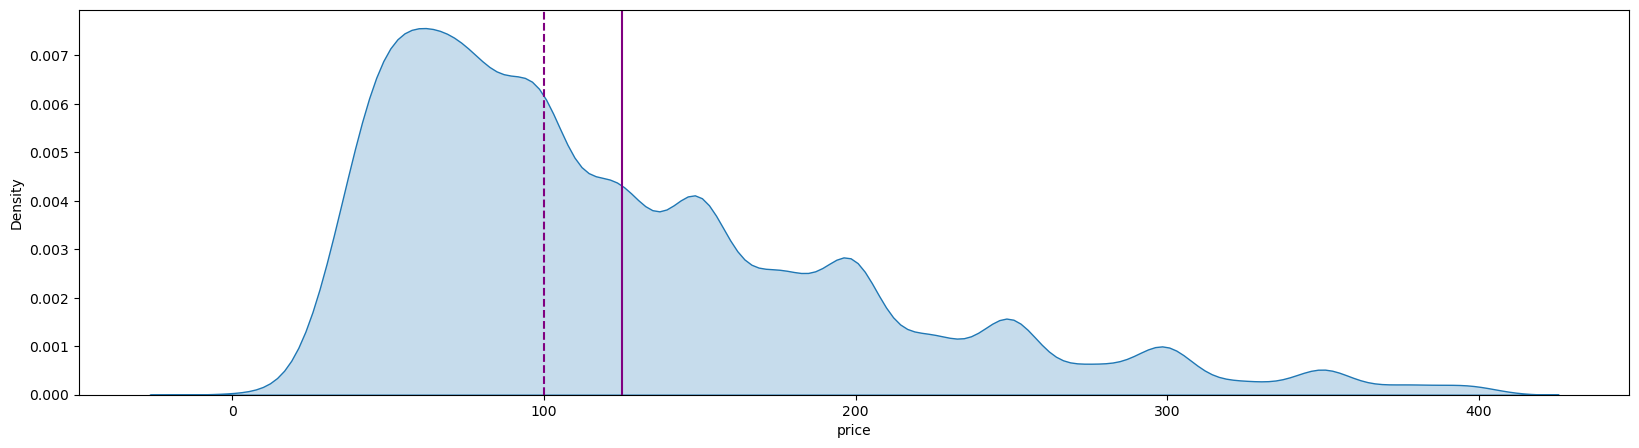

In [37]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb.price[airbnb.price<400], shade = True)
plt.axvline(airbnb.price[airbnb.price<400].mean(), color='purple')
plt.axvline(airbnb.price[airbnb.price<400].median(), ls='--', color='purple')

In [38]:
airbnb['price_range'] = pd.cut(airbnb.price, bins=[0,150,300,600,10000], labels=['Affordable','Medium','High','Luxury'], include_lowest=True)     

In [39]:
airbnb.price_range.value_counts()

Affordable    33930
Medium        11573
High           2577
Luxury          778
Name: price_range, dtype: int64

### minimum_nights

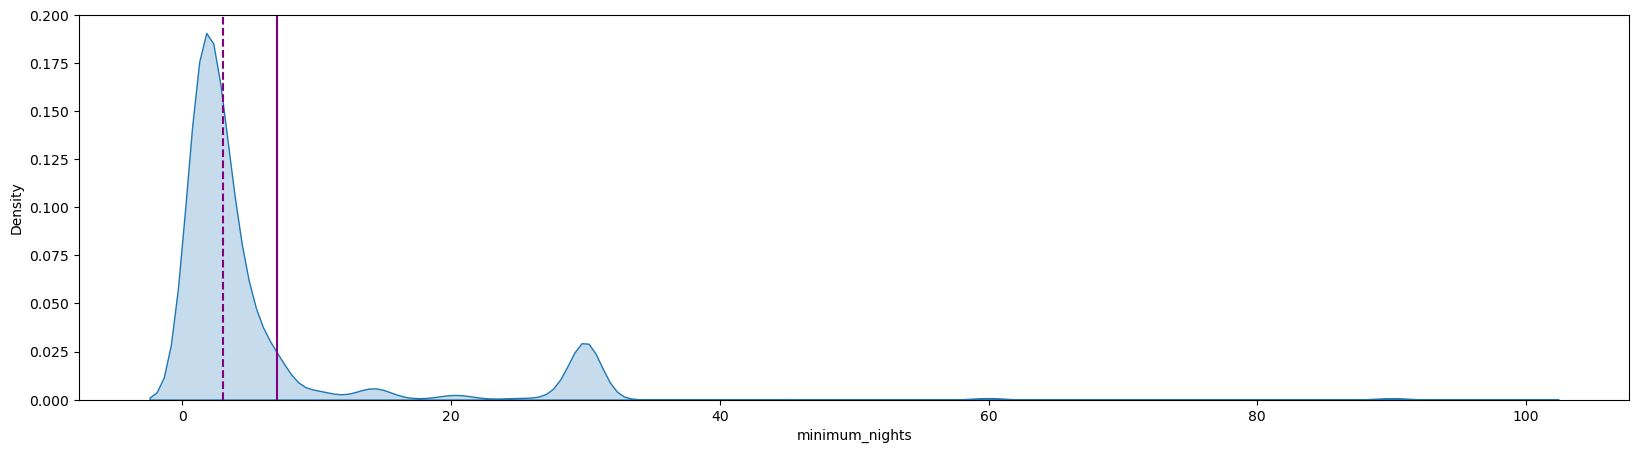

In [40]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['minimum_nights'][airbnb['minimum_nights']<100], shade = True)
plt.axvline(airbnb['minimum_nights'].mean(), color='purple')
plt.axvline(airbnb['minimum_nights'].median(), ls='--', color='purple')

In [41]:
airbnb['minimum_nights'].describe([.1,.25,.5,.75,.9,.95,.99,.995])

count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
10%          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
90%         28.000000
95%         30.000000
99%         45.000000
99.5%       90.000000
max       1250.000000
Name: minimum_nights, dtype: float64

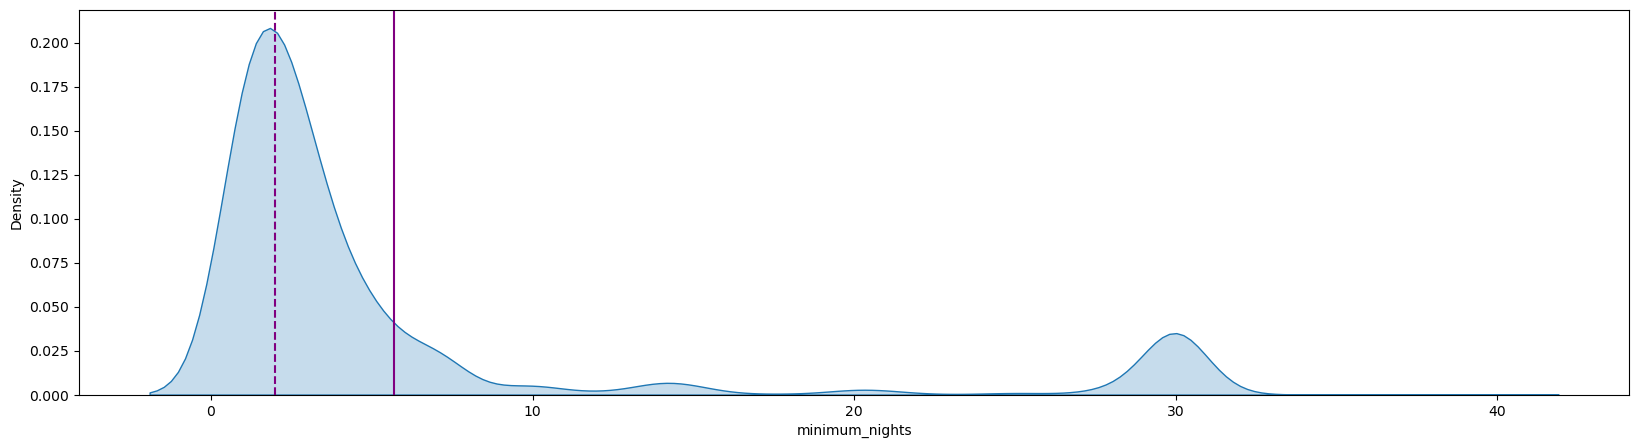

In [42]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['minimum_nights'][airbnb['minimum_nights']<40], shade = True)
plt.axvline(airbnb['minimum_nights'][airbnb['minimum_nights']<40].mean(), color='purple')
plt.axvline(airbnb['minimum_nights'][airbnb['minimum_nights']<40].median(), ls='--', color='purple')

In [43]:
airbnb['minimum_nights_range'] = pd.cut(airbnb['minimum_nights'], bins=[0,2,5,10,30,2000], labels=['1 to 2','3 to 5','6 to 10','11 to 30','above 40'])

In [44]:
airbnb.minimum_nights_range.value_counts(normalize = True)

1 to 2      0.499284
3 to 5      0.293217
11 to 30    0.120594
6 to 10     0.071636
above 40    0.015269
Name: minimum_nights_range, dtype: float64

### number_of_reviews

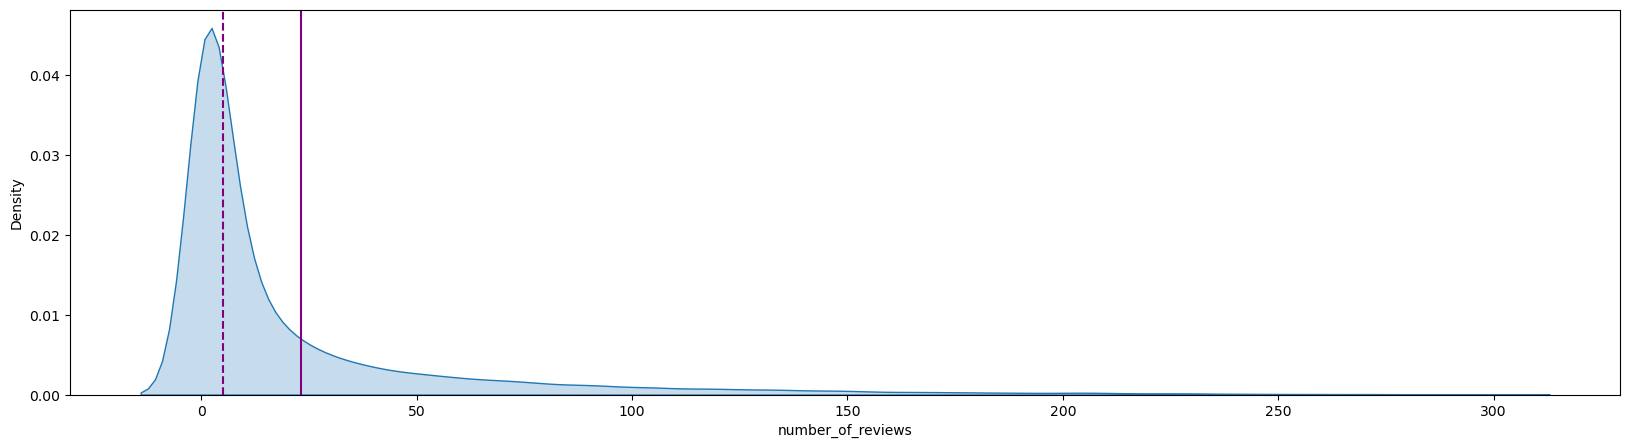

In [45]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['number_of_reviews'][airbnb['number_of_reviews']<300], shade = True)
plt.axvline(airbnb['number_of_reviews'].mean(), color='purple')
plt.axvline(airbnb['number_of_reviews'].median(), ls='--', color='purple')

In [46]:
airbnb['number_of_reviews'].describe([.1,.25,.5,.75,.9,.95,.99])

count    48858.000000
mean        23.273098
std         44.549898
min          0.000000
10%          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
90%         70.000000
95%        114.000000
99%        214.000000
max        629.000000
Name: number_of_reviews, dtype: float64

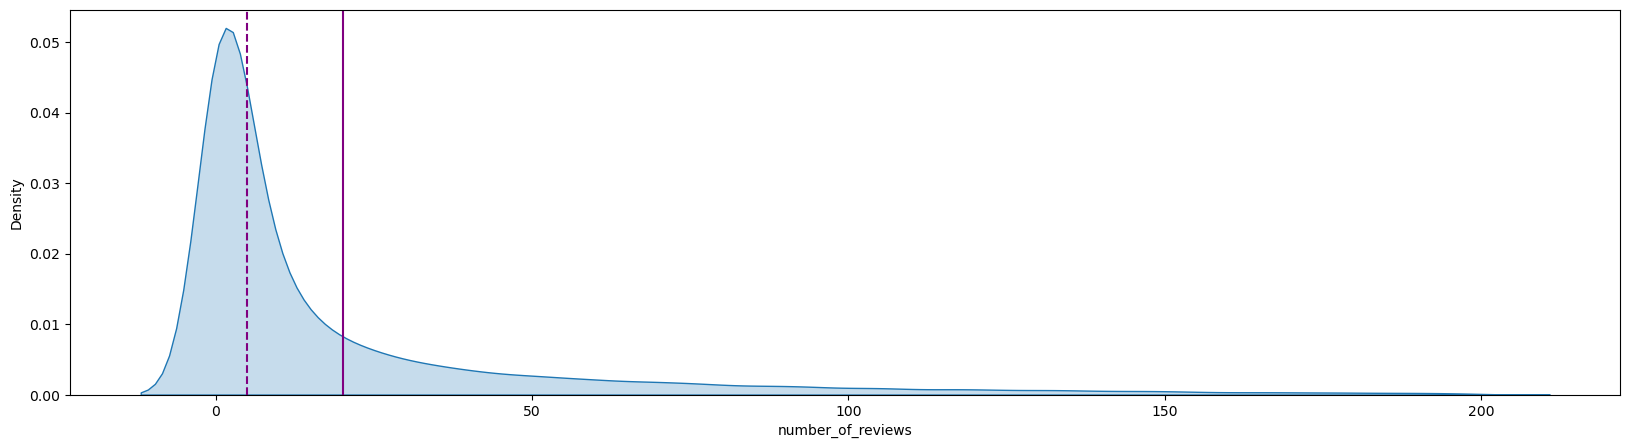

In [47]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['number_of_reviews'][airbnb['number_of_reviews']<200], shade = True)
plt.axvline(airbnb['number_of_reviews'][airbnb['number_of_reviews']<200].mean(), color='purple')
plt.axvline(airbnb['number_of_reviews'][airbnb['number_of_reviews']<200].median(), ls='--', color='purple')

In [48]:
airbnb['number_of_reviews_range'] = pd.cut(airbnb['number_of_reviews'], bins=[0,1,6,21,51,1000],right = False, labels=['No Reviews','1 to 5','6 to 20','21 to 50','Above 50'], include_lowest = True)   

In [49]:
airbnb['number_of_reviews_range'].value_counts(normalize= True)

1 to 5        0.303553
6 to 20       0.220066
No Reviews    0.205432
Above 50      0.142310
21 to 50      0.128638
Name: number_of_reviews_range, dtype: float64

### reviews_per_month

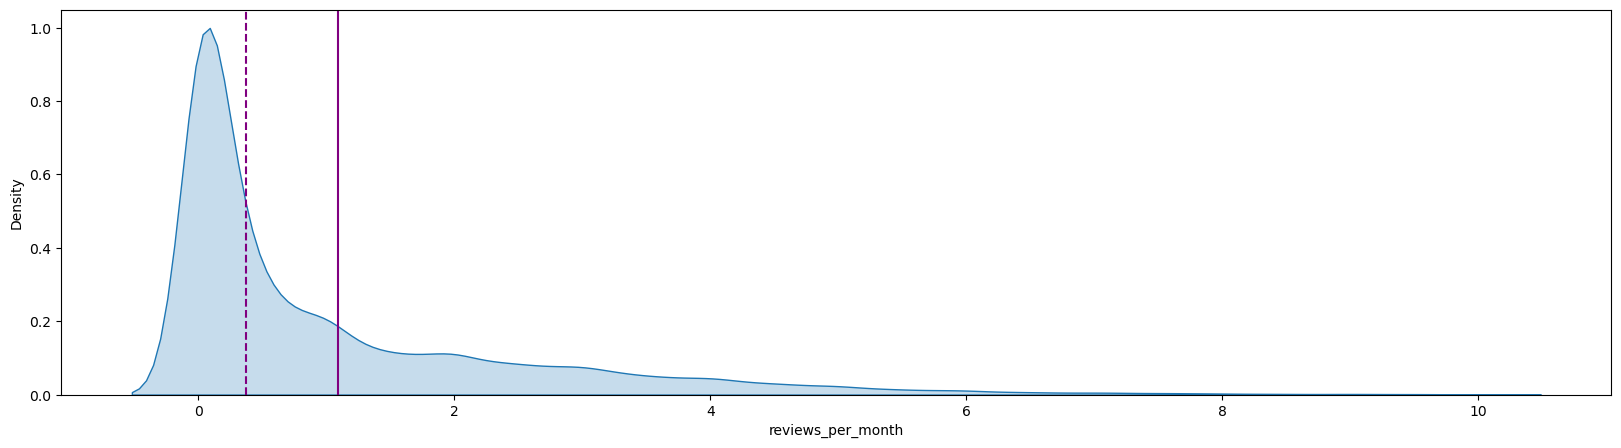

In [50]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['reviews_per_month'][airbnb['reviews_per_month']<10], shade = True)
plt.axvline(airbnb['reviews_per_month'].mean(), color='purple')
plt.axvline(airbnb['reviews_per_month'].median(), ls='--', color='purple')

In [51]:
airbnb['reviews_per_month'].describe([.1,.25,.5,.75,.9,.95,.99])

count    48858.000000
mean         1.091124
std          1.597270
min          0.000000
10%          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
90%          3.250000
95%          4.310000
99%          6.800000
max         58.500000
Name: reviews_per_month, dtype: float64

In [52]:
print(airbnb['reviews_per_month'].mean(),airbnb['reviews_per_month'].median(),
      '\n',
airbnb['reviews_per_month'][airbnb['reviews_per_month']<8].mean())

1.0911238691719074 0.37 
 1.0455992759734447


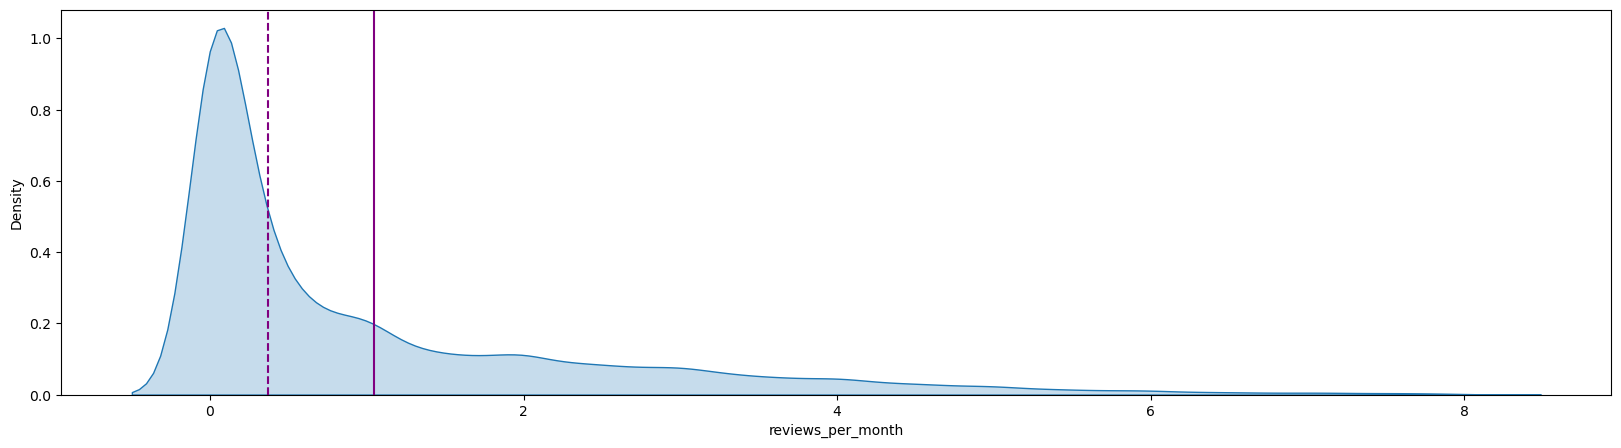

In [53]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['reviews_per_month'][airbnb['reviews_per_month']<8], shade = True)
plt.axvline(airbnb['reviews_per_month'][airbnb['reviews_per_month']<8].mean(), color='purple')
plt.axvline(airbnb['reviews_per_month'][airbnb['reviews_per_month']<8].median(), ls='--', color='purple')

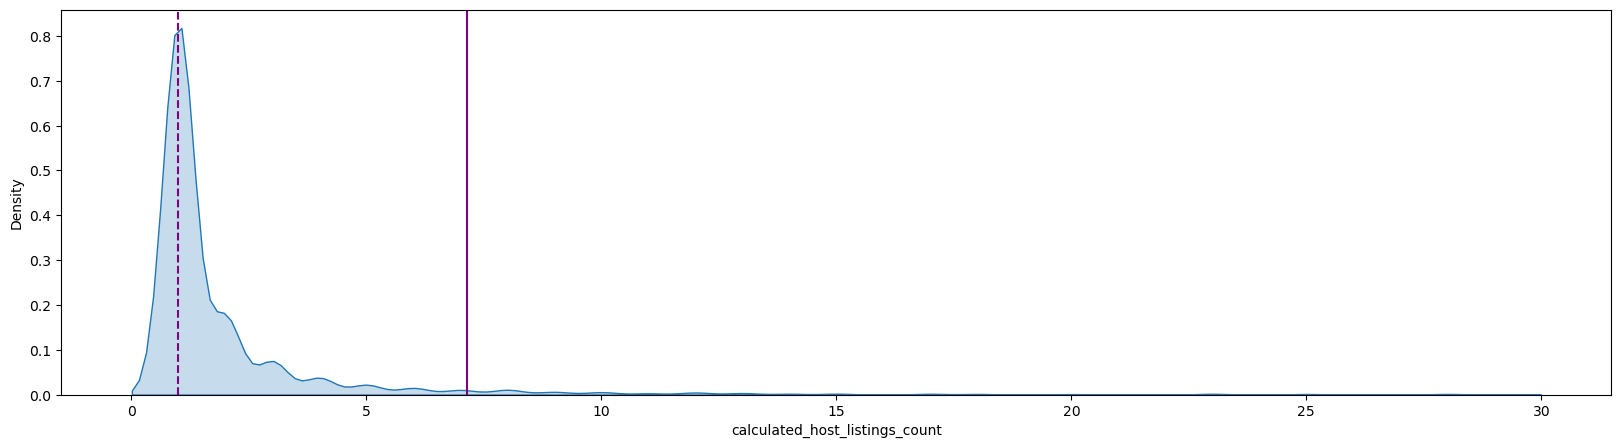

In [54]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['calculated_host_listings_count'][airbnb['calculated_host_listings_count']<30], shade = True)
plt.axvline(airbnb['calculated_host_listings_count'].mean(), color='purple')
plt.axvline(airbnb['calculated_host_listings_count'].median(), ls='--', color='purple')

In [55]:
airbnb['calculated_host_listings_count'].describe([.25,.5,.75,.8,.9,.95,.97,.99])

count    48858.000000
mean         7.148369
std         32.964600
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
80%          3.000000
90%          5.000000
95%         15.000000
97%         49.000000
99%        232.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

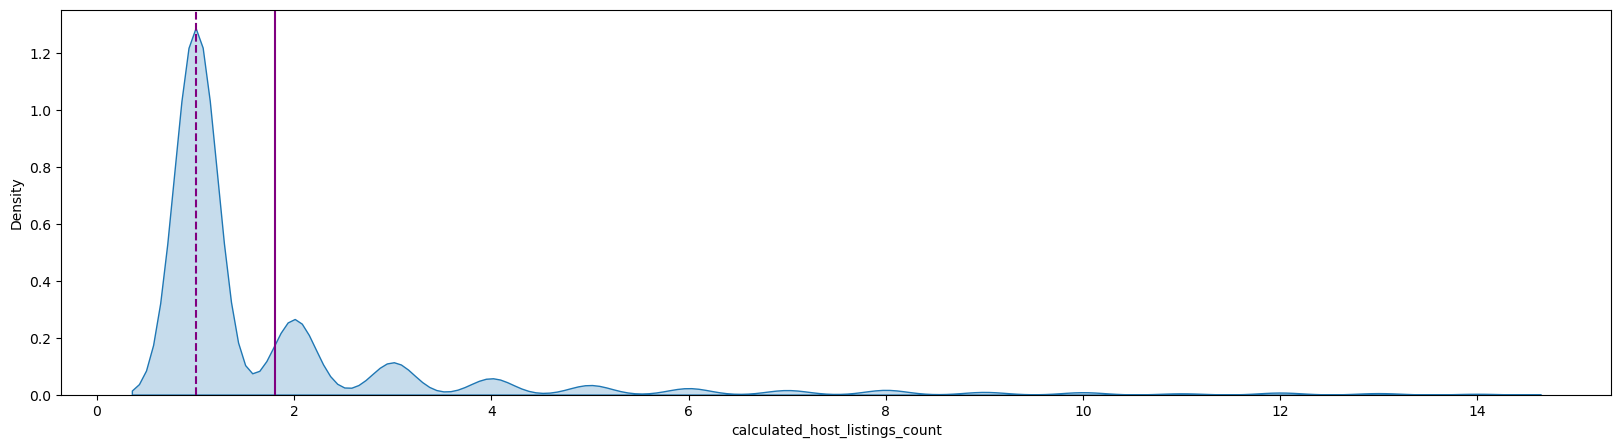

In [56]:
plt.figure(figsize = [20,5])
sns.kdeplot(airbnb['calculated_host_listings_count'][airbnb['calculated_host_listings_count']<15], shade = True)
plt.axvline(airbnb['calculated_host_listings_count'][airbnb['calculated_host_listings_count']<15].mean(), color='purple')
plt.axvline(airbnb['calculated_host_listings_count'][airbnb['calculated_host_listings_count']<15].median(), ls='--', color='purple')

In [57]:
airbnb['number_of_listings_range'] = pd.cut(airbnb['calculated_host_listings_count'], bins=[0,1,5,20,500], labels=['1','2 to 5','6 to 20','More than 20'])

In [58]:
airbnb['number_of_listings_range'].value_counts()

1               32273
2 to 5          11789
6 to 20          2591
More than 20     2205
Name: number_of_listings_range, dtype: int64

In [59]:
airbnb[(airbnb.reviews_per_month<8) & (airbnb.price<2000) & (airbnb.number_of_reviews<400)].shape[0]/len(airbnb)*100

99.23656310123215

We still retain 99.2% data

In [60]:
airbnb = airbnb[(airbnb.reviews_per_month<8) & (airbnb.price<2000) & (airbnb.number_of_reviews<400)]


In [61]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range,minimum_nights_range,number_of_reviews_range,number_of_listings_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Affordable,1 to 2,6 to 20,6 to 20
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Medium,1 to 2,21 to 50,2 to 5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365,Affordable,3 to 5,No Reviews,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Affordable,1 to 2,Above 50,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Affordable,6 to 10,6 to 20,1


In [69]:
# airbnb.to_csv('_storytelling.csv', encoding ='utf-8')

In [67]:
# ?airbnb.to_csv

# Analysis

###### defining a function to annotate bar plots

In [62]:
def bar_annot(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',    
                       xytext=(0,7),textcoords='offset points')
# This will annotate each bar in a barplot with its height, i.e. its value

###### defining a function to plot segmeted bar graph wrt TARGET variable

In [63]:
def graph(col, col2 = 0):
    plt.figure(figsize=[22,24])

    # 1st subplot will plot countplot for a given variable, and segment it wrt TARGET variable
    plt.subplot(211)
    splot = sns.countplot(data=airbnb, x=str(col), palette='cubehelix') 
#     plt.title( str(col)+' (Non-Default/Default)', fontdict={'fontsize':40})
    plt.xlabel(None)
#     plt.legend(labels=['Non-Defaulter', 'Defaulter'], prop={'size':25})
    bar_annot(splot)

    # 2nd plot plots count plot for a given variable where TARGET variable equals 0 (client with payment difficulty)
    if col2!=0:
        plt.subplot(212)
        splot = sns.countplot(airbnb[col], hue= airbnb[col2], palette='magma') 
        plt.xlabel(None)
#     plt.title(str(col)+' Range Defaulter', fontdict={'fontsize':40})
    bar_annot(splot)

    plt.show()

In [64]:
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price_range                             category
minimum_nights_range                    category
number_of_reviews_range                 category
number_of_listings_range                category
dtype: object

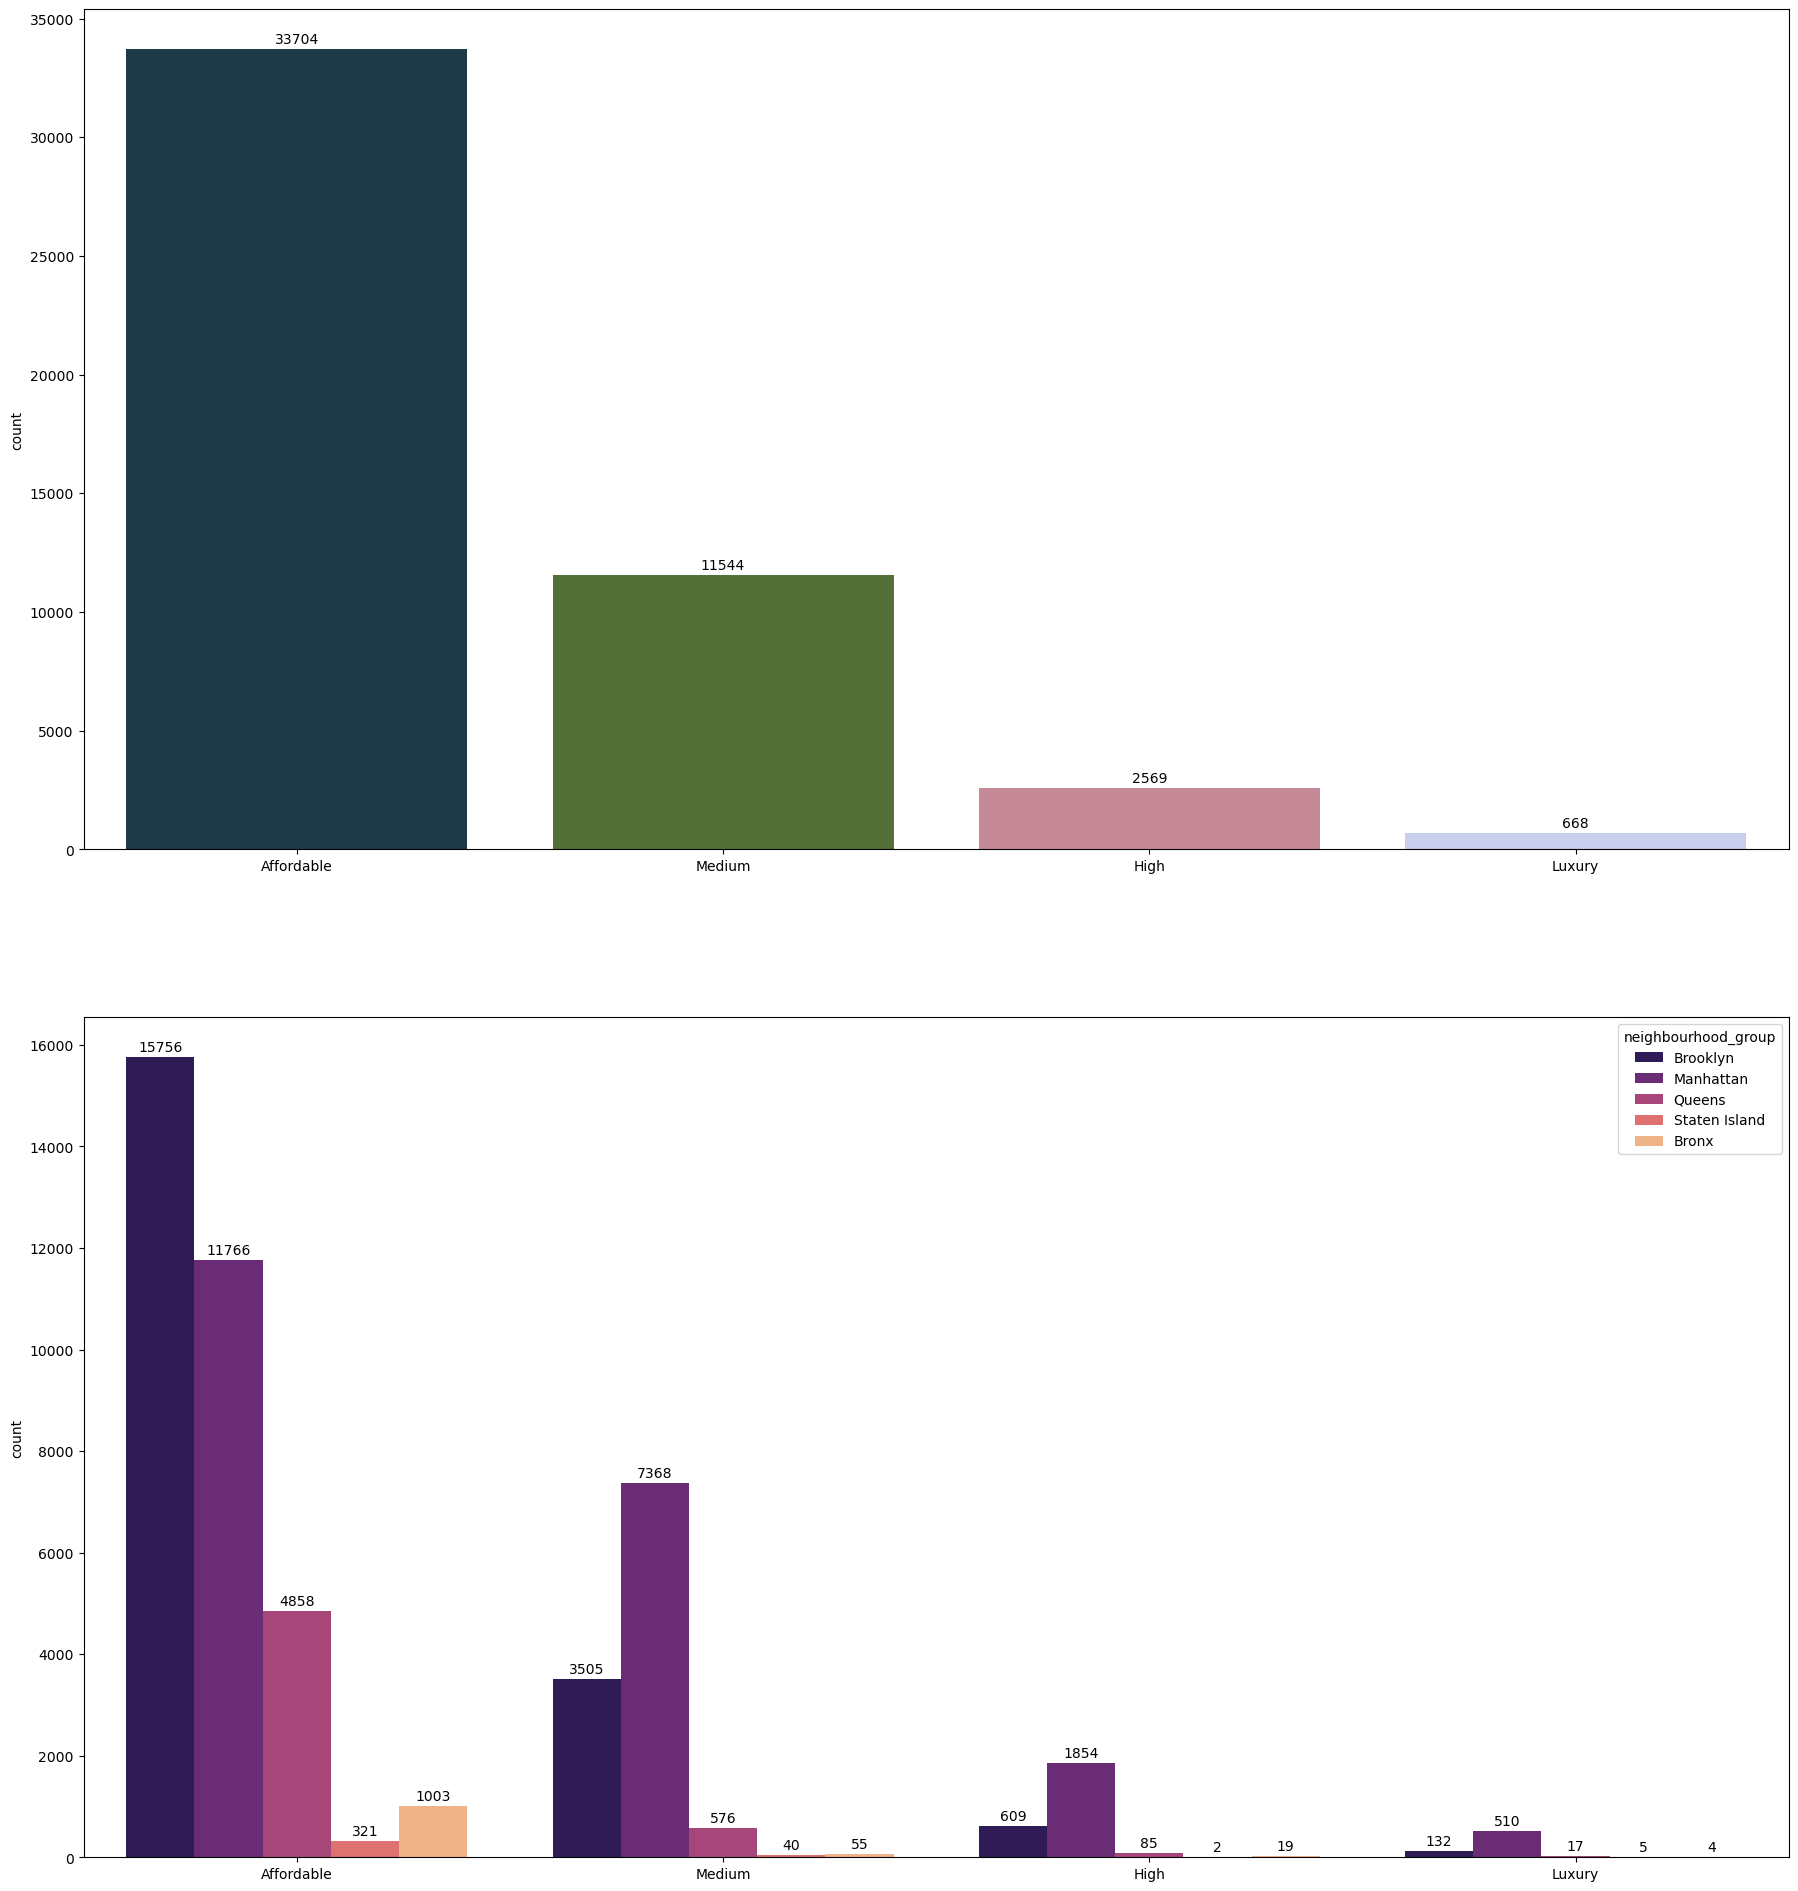

In [65]:
graph('price_range','neighbourhood_group')

In [66]:
airbnb.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.587030,-0.002398,0.089063,0.020886,-0.012359,-0.332132,0.181359,0.134224,0.085396
host_id,0.587030,1.000000,0.021294,0.123740,0.031774,-0.016528,-0.149306,0.203404,0.156613,0.203844
latitude,-0.002398,0.021294,1.000000,0.088380,0.054129,0.026020,-0.015585,-0.015938,0.019497,-0.011054
longitude,0.089063,0.123740,0.088380,1.000000,-0.238184,-0.062964,0.039597,0.113280,-0.115582,0.082196
price,0.020886,0.031774,0.054129,-0.238184,1.000000,0.022787,-0.055100,-0.054911,0.111128,0.114668
minimum_nights,-0.012359,-0.016528,0.026020,-0.062964,0.022787,1.000000,-0.082125,-0.132665,0.132745,0.147067
number_of_reviews,-0.332132,-0.149306,-0.015585,0.039597,-0.055100,-0.082125,1.000000,0.599902,-0.074833,0.173996
reviews_per_month,0.181359,0.203404,-0.015938,0.113280,-0.054911,-0.132665,0.599902,1.000000,-0.048664,0.170441
calculated_host_listings_count,0.134224,0.156613,0.019497,-0.115582,0.111128,0.132745,-0.074833,-0.048664,1.000000,0.227179
availability_365,0.085396,0.203844,-0.011054,0.082196,0.114668,0.147067,0.173996,0.170441,0.227179,1.000000


<AxesSubplot:>

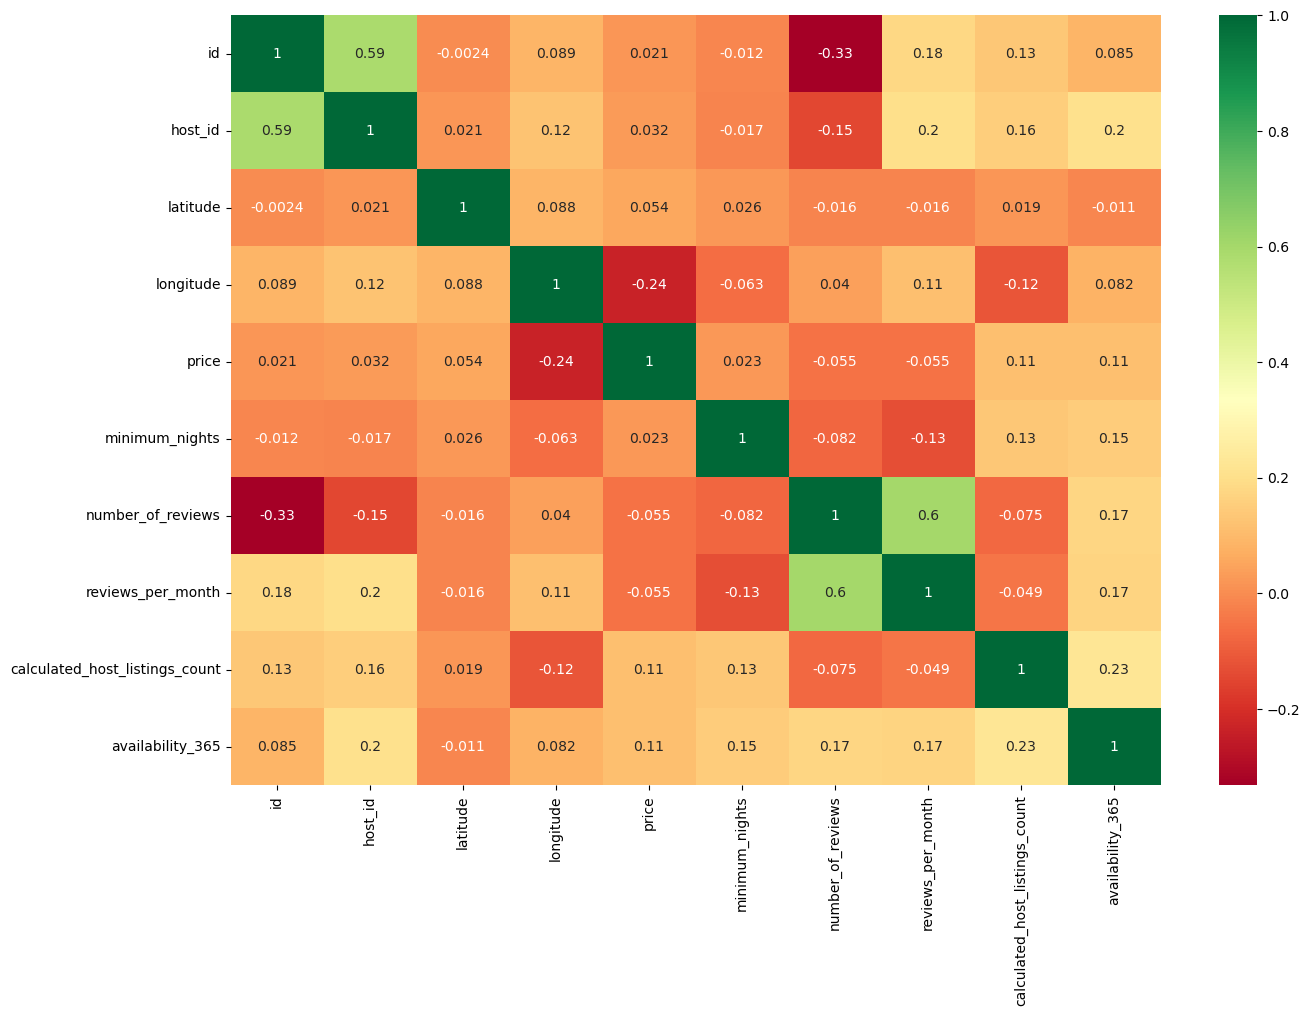

In [67]:
plt.figure(figsize = [15,10])
sns.heatmap(airbnb.corr(), cmap = 'RdYlGn', annot = True)